# Fit flu data with scikit-learn models

As an attempt to figure out a nice interface for the fitness model class itself, I wanted to see what steps would be required to go from tip attributes and final clade frequencies data frames to beta parameters for a number of predictors with a scikit-learn standard regression model. Below I attempt this model fitting using the linear regression model.

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
import statsmodels.formula.api as smf

%matplotlib inline

In [10]:
X = pd.read_csv("standardized_tip_attributes.tsv", sep="\t")

In [11]:
X = X.loc[:, ["strain", "clade_membership", "timepoint", "cTiterSub", "lbi", "ep", "ne", "frequency"]].copy()

In [12]:
X.head()

,strain,clade_membership,timepoint,cTiterSub,lbi,ep,ne,frequency
0,A/Australia/22/2009,"SigPep:9Y,HA1:50E,HA1:62K,HA1:140I,HA1:144K,HA...",2009-10-01,3.074121,-0.201707,9,6,0.000261
1,A/Brazil/1814/2009,"SigPep:9Y,HA1:50E,HA1:140I,HA1:173Q,HA1:193F,H...",2009-10-01,1.004591,-1.085007,5,9,0.000003
2,A/Brazil/884/2009,"SigPep:9Y,HA1:50E,HA1:140I,HA1:173Q,HA1:193F,H...",2009-10-01,1.004591,-1.269448,4,8,0.003814
3,A/Colombia/227/2009,"SigPep:9Y,HA1:50E,HA1:140I,HA1:173Q,HA1:193F,H...",2009-10-01,1.004603,-1.382931,6,8,0.000001
4,A/CostaRica/3090/2009,"SigPep:9Y,HA1:50E,HA1:62K,HA1:140I,HA1:144K,HA...",2009-10-01,3.074121,-0.113271,10,6,0.001549


There isn't a clear way to map multiple tips from one timepoint to multiple different tips in a future timepoint using the standard linear regression approach. The simplest way I can see to handle this is to summarize the input and output matrices by clade. A better approach would be to have some support for hierarchical modeling which is outside the scope of this attempt.

In [18]:
grouped_X = X.groupby(["timepoint", "clade_membership"]).aggregate({
    "frequency": "sum",
    "cTiterSub": "mean",
    "lbi": "mean",
    "ep": "mean",
    "ne": "mean"
}).reset_index()

In [19]:
grouped_X.head()

,timepoint,clade_membership,frequency,cTiterSub,lbi,ep,ne
0,2009-10-01,"SigPep:9Y,HA1:50E,HA1:140I,HA1:158N,HA1:173Q,H...",0.537488,1.004591,1.203186,7.750000,6.500000
1,2009-10-01,"SigPep:9Y,HA1:50E,HA1:140I,HA1:158R,HA1:193F,H...",0.000003,1.190845,-1.036770,8.000000,6.000000
2,2009-10-01,"SigPep:9Y,HA1:50E,HA1:140I,HA1:173Q,HA1:193F,H...",0.058907,1.004592,-1.073766,4.400000,7.300000
3,2009-10-01,"SigPep:9Y,HA1:50E,HA1:62K,HA1:140I,HA1:144K,HA...",0.278036,3.074121,0.914128,9.300000,6.400000
4,2009-10-01,"SigPep:9Y,HA1:50E,HA1:62K,HA1:140I,HA1:144K,HA...",0.125566,3.419726,-0.010970,9.666667,6.333333


In [30]:
grouped_X.loc[:, ["lbi"]].values

array([[ 1.20318616],
       [-1.03676998],
       [-1.07376592],
       [ 0.91412811],
       [-0.01096963],
       [-0.22818173],
       [-0.52471774],
       [-0.47640192],
       [-1.72632703],
       [-1.762719  ],
       [-1.16194532],
       [-0.26227434],
       [-0.26407564],
       [-1.20748964],
       [ 0.11771159],
       [-0.91633487],
       [-0.27266383],
       [ 0.88385441],
       [ 0.06026402],
       [-1.30488079],
       [-1.65672665],
       [ 0.51943552]])

In [13]:
Y = pd.read_table("final_clade_frequencies.tsv", sep="\t")

In [14]:
Y.head()

,initial_timepoint,clade_membership,final_timepoint,strain,frequency
0,2009-10-01,"SigPep:9Y,HA1:50E,HA1:62K,HA1:140I,HA1:144K,HA...",2010-10-01,NaN,0.000000
1,2009-10-01,"SigPep:9Y,HA1:50E,HA1:140I,HA1:173Q,HA1:193F,H...",2010-10-01,NaN,0.000000
2,2009-10-01,"SigPep:9Y,HA1:50E,HA1:140I,HA1:158N,HA1:173Q,H...",2010-10-01,A/Alabama/5/2010,0.001952
3,2009-10-01,"SigPep:9Y,HA1:50E,HA1:140I,HA1:158N,HA1:173Q,H...",2010-10-01,A/Alaska/5/2010,0.016012
4,2009-10-01,"SigPep:9Y,HA1:50E,HA1:140I,HA1:158N,HA1:173Q,H...",2010-10-01,A/Argentina/27893/2010,0.045617


In [24]:
grouped_Y = Y.groupby(["initial_timepoint", "final_timepoint", "clade_membership"])["frequency"].sum().reset_index()

In [25]:
grouped_Y.head()

,initial_timepoint,final_timepoint,clade_membership,frequency
0,2009-10-01,2010-10-01,"SigPep:9Y,HA1:50E,HA1:140I,HA1:158N,HA1:173Q,H...",0.849796
1,2009-10-01,2010-10-01,"SigPep:9Y,HA1:50E,HA1:140I,HA1:158R,HA1:193F,H...",0.000000
2,2009-10-01,2010-10-01,"SigPep:9Y,HA1:50E,HA1:140I,HA1:173Q,HA1:193F,H...",0.000000
3,2009-10-01,2010-10-01,"SigPep:9Y,HA1:50E,HA1:62K,HA1:140I,HA1:144K,HA...",0.000000
4,2009-10-01,2010-10-01,"SigPep:9Y,HA1:50E,HA1:62K,HA1:140I,HA1:144K,HA...",0.150200


In [32]:
grouped_Y.loc[:, "frequency"].values

array([0.849796, 0.      , 0.      , 0.      , 0.1502  , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      ])

In [43]:
y = grouped_Y.loc[:, "frequency"].values

In [27]:
reg = linear_model.LinearRegression()

## Fit a linear regression model with initial frequency and LBI

In [44]:
x = grouped_X.loc[:, ["frequency", "lbi"]].values
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [45]:
reg.coef_

array([6.35133486e-01, 4.88227466e-04])

## Fit a linear regression model with initial frequency, LBI, and cTiterSub

In [46]:
x = grouped_X.loc[:, ["frequency", "lbi", "cTiterSub"]].values
reg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
reg.coef_

array([ 0.47212291,  0.03328364, -0.03680707])

## Try to predict values from a fit model

In [49]:
y_hat = reg.predict(x)

In [51]:
residuals = y - y_hat

(array([1., 3., 8., 5., 4., 0., 0., 0., 0., 1.]),
 array([-0.2362368 , -0.16378784, -0.09133889, -0.01888994,  0.05355901,
         0.12600797,  0.19845692,  0.27090587,  0.34335482,  0.41580378,
         0.48825273]),
 <a list of 10 Patch objects>)

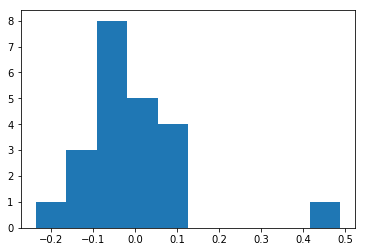

In [54]:
plt.hist(residuals)

## Try fitting a linear mixed effects model

Try using the [statsmodels functionality for linear mixed models](https://www.statsmodels.org/dev/mixed_linear.html). It is still not clear how to actually map tip data from one timepoint to tip data from a later timepoint in this framework. 

In [56]:
grouped_X.head()

,timepoint,clade_membership,frequency,cTiterSub,lbi,ep,ne
0,2009-10-01,"SigPep:9Y,HA1:50E,HA1:140I,HA1:158N,HA1:173Q,H...",0.537488,1.004591,1.203186,7.750000,6.500000
1,2009-10-01,"SigPep:9Y,HA1:50E,HA1:140I,HA1:158R,HA1:193F,H...",0.000003,1.190845,-1.036770,8.000000,6.000000
2,2009-10-01,"SigPep:9Y,HA1:50E,HA1:140I,HA1:173Q,HA1:193F,H...",0.058907,1.004592,-1.073766,4.400000,7.300000
3,2009-10-01,"SigPep:9Y,HA1:50E,HA1:62K,HA1:140I,HA1:144K,HA...",0.278036,3.074121,0.914128,9.300000,6.400000
4,2009-10-01,"SigPep:9Y,HA1:50E,HA1:62K,HA1:140I,HA1:144K,HA...",0.125566,3.419726,-0.010970,9.666667,6.333333


In [57]:
grouped_Y.head()

,initial_timepoint,final_timepoint,clade_membership,frequency
0,2009-10-01,2010-10-01,"SigPep:9Y,HA1:50E,HA1:140I,HA1:158N,HA1:173Q,H...",0.849796
1,2009-10-01,2010-10-01,"SigPep:9Y,HA1:50E,HA1:140I,HA1:158R,HA1:193F,H...",0.000000
2,2009-10-01,2010-10-01,"SigPep:9Y,HA1:50E,HA1:140I,HA1:173Q,HA1:193F,H...",0.000000
3,2009-10-01,2010-10-01,"SigPep:9Y,HA1:50E,HA1:62K,HA1:140I,HA1:144K,HA...",0.000000
4,2009-10-01,2010-10-01,"SigPep:9Y,HA1:50E,HA1:62K,HA1:140I,HA1:144K,HA...",0.150200


In [60]:
data = grouped_X.merge(
    grouped_Y,
    left_on=["timepoint", "clade_membership"],
    right_on=["initial_timepoint", "clade_membership"],
    suffixes=["_initial", "_final"]
)

In [61]:
data.head()

,timepoint,clade_membership,frequency_initial,cTiterSub,lbi,ep,ne,initial_timepoint,final_timepoint,frequency_final
0,2009-10-01,"SigPep:9Y,HA1:50E,HA1:140I,HA1:158N,HA1:173Q,H...",0.537488,1.004591,1.203186,7.750000,6.500000,2009-10-01,2010-10-01,0.849796
1,2009-10-01,"SigPep:9Y,HA1:50E,HA1:140I,HA1:158R,HA1:193F,H...",0.000003,1.190845,-1.036770,8.000000,6.000000,2009-10-01,2010-10-01,0.000000
2,2009-10-01,"SigPep:9Y,HA1:50E,HA1:140I,HA1:173Q,HA1:193F,H...",0.058907,1.004592,-1.073766,4.400000,7.300000,2009-10-01,2010-10-01,0.000000
3,2009-10-01,"SigPep:9Y,HA1:50E,HA1:62K,HA1:140I,HA1:144K,HA...",0.278036,3.074121,0.914128,9.300000,6.400000,2009-10-01,2010-10-01,0.000000
4,2009-10-01,"SigPep:9Y,HA1:50E,HA1:62K,HA1:140I,HA1:144K,HA...",0.125566,3.419726,-0.010970,9.666667,6.333333,2009-10-01,2010-10-01,0.150200


In [64]:
md = smf.mixedlm("frequency_final ~ frequency_initial + lbi + cTiterSub", data, groups=data["initial_timepoint"])

In [65]:
mdf = md.fit()

/Users/jlhudd/miniconda3/envs/nextstrain/lib/python3.6/site-packages/statsmodels/regression/mixed_linear_model.py:2045: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [66]:
print(mdf.summary())

            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: frequency_final
No. Observations: 22      Method:             REML           
No. Groups:       3       Scale:              0.0227         
Min. group size:  5       Likelihood:         4.2178         
Max. group size:  9       Converged:          Yes            
Mean group size:  7.3                                        
-------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------
Intercept           0.093    0.136  0.689 0.491 -0.172  0.359
frequency_initial   0.528    0.380  1.387 0.165 -0.218  1.273
lbi                 0.016    0.076  0.214 0.831 -0.133  0.166
cTiterSub          -0.037    0.028 -1.336 0.181 -0.091  0.017
Group Var           0.002    0.047                           

